### Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.preprocessing import MinMaxScaler

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Load data

In [ ]:
path = '/content/gdrive/MyDrive/Tesi/data/Dati/'
plot_path = path + 'plot/load_weather/'
results_path = path + 'results/'
data_path = path + 'data/load/data_load_weather_encoded.xlsx'
data = pd.read_excel(data_path)

### Pre-processing

In [ ]:
data = data.set_index("datetime")
data_initial = data.copy()

In [ ]:
scaler = MinMaxScaler()
data['carico'] = scaler.fit_transform(data[['carico']])
data['solarradiation'] = scaler.fit_transform(data[['solarradiation']])
data['solarenergy'] = scaler.fit_transform(data[['solarenergy']])

In [ ]:
data

,Unnamed: 0,carico,solarradiation,solarenergy,uvindex,year,month,day,hour,month_1,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
datetime,,,,,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00,0,8.330261e-12,0.0,0.0,0,2013,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2013-01-01 01:00:00,1,9.436048e-12,0.0,0.0,0,2013,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2013-01-01 02:00:00,2,1.164762e-11,0.0,0.0,0,2013,1,1,2,1,...,0,0,0,0,0,0,0,0,0,0
2013-01-01 03:00:00,3,9.804644e-12,0.0,0.0,0,2013,1,1,3,1,...,0,0,0,0,0,0,0,0,0,0
2013-01-01 04:00:00,4,9.804644e-12,0.0,0.0,0,2013,1,1,4,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-12-31 19:00:00,8755,4.334685e-11,0.0,0.0,0,2013,12,31,19,0,...,0,0,0,0,0,0,0,0,0,1
2013-12-31 20:00:00,8756,4.334685e-11,0.0,0.0,0,2013,12,31,20,0,...,0,0,0,0,0,0,0,0,0,1
2013-12-31 21:00:00,8757,4.187246e-11,0.0,0.0,0,2013,12,31,21,0,...,0,0,0,0,0,0,0,0,0,1


# Models

### SARIMA

In [ ]:
# Split the data into training and testing sets
train_data = data.loc['2013-01-01':'2013-10-31']
test_data = data.loc['2013-11-01':'2013-11-01']
#train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [ ]:
# Define the SARIMA model
model_SARIMA = SARIMAX(train_data.carico, order=(1, 1, 1), seasonal_order=(1, 0, 0, 24),
                enforce_stationarity=False, enforce_invertibility=False)

# Fit the model to the training data
model_fit = model_SARIMA.fit()

In [ ]:
# Make predictions on one day
date = '2013-07-01'
end = date + ' 23:00:00'
predictions_S = model_fit.predict(start=date , end=end, dynamic=True)
actual_S = data.carico.loc[date]
test_results_S = pd.concat([actual_S, predictions_S], axis=1)
#test_results_S.to_csv('test_results_SARIMA_010713.csv')

In [ ]:
# Make predictions
date = '2013-01-02'
end = '2013-12-31' + ' 23:00:00'
predictions_S = model_fit.predict(start=date , end=end, dynamic=True)
test_results_S = pd.concat([data, predictions_S], axis=1)
test_results_S.to_csv('test_results_SARIMA.csv')

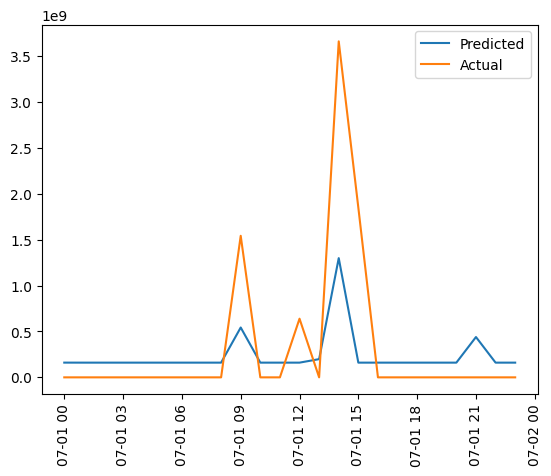

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plot the predicted values and the actual values for the selected day
plt.plot(predictions_S, label='Predicted')
plt.plot(actual_S, label='Actual')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()
plt.savefig('test_results_predictions_SARIMA_010713.png')

In [ ]:
mse_S = mean_squared_error(actual_S, predictions_S)
mae_S = mean_absolute_error(actual_S, predictions_S)
rmse_S = math.sqrt(mse_S)
print('mse SARIMA: ' + str(mse_S))
print('mae SARIMA: ' + str(mae_S))
print('rmse SARIMA: ' + str(rmse_S))

mse SARIMA: 4.3159805011246317e+17
mae SARIMA: 377281903.1273496
rmse SARIMA: 656961224.2076873


## LSTM & GRU

In [ ]:
def df_to_X_y(df, window_size):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = df_as_np[i:i+window_size]
    X.append(row)
    label = df_as_np[i + window_size][0]
    y.append(label)
  return np.array(X), np.array(y)

In [ ]:
# Defining the window size
win_size = 3
X1, y1 = df_to_X_y(data, win_size)
X1.shape, y1.shape

((8757, 3, 21), (8757,))

In [ ]:
# Split the data into training, validation and testing sets
train_size = int(len(data) * 0.6)
val_size = int(len(data) * 0.1)
test_local_size = int(len(data) * 0.1)
test_size = len(data) - train_size - val_size - test_local_size

X_train, y_train = X1[:train_size], y1[:train_size]
X_val, y_val = X1[train_size : train_size + val_size], y1[train_size : train_size + val_size]
X_test_local, y_test_local = X1[train_size + val_size : train_size + val_size + test_local_size], y1[train_size + val_size : train_size + val_size + test_local_size]
X_test, y_test = X1[train_size + val_size + test_local_size:], y1[train_size + val_size + test_local_size:]

X_train_val = np.concatenate((X_train, X_val))
y_train_val = np.concatenate((y_train, y_val))
X_train_val_test = np.concatenate((X_train_val, X_test_local))
y_train_val_test = np.concatenate((y_train_val, y_test_local))

In [ ]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test_local.shape, y_test_local.shape, X_test.shape, y_test.shape

((5256, 3, 21),
 (5256,),
 (876, 3, 21),
 (876,),
 (876, 3, 21),
 (876,),
 (1749, 3, 21),
 (1749,))

### LSTM

In [ ]:
learning_rate_LSTM = 0.001
epochs_LSTM = 100
batch_size_LSTM = 32

In [ ]:
# Create the model
model_LSTM = Sequential()
model_LSTM.add(InputLayer((3, 21)))
model_LSTM.add(LSTM(64))
model_LSTM.add(Dense(8, 'relu'))
model_LSTM.add(Dense(1, 'linear'))
#model_LSTM.summary()
cp_LSTM = ModelCheckpoint('/content/gdrive/MyDrive/Tesi/data/Dati/models/load_weather_OHE/model_LSTM/', save_best_only=True)
model_LSTM.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=learning_rate_LSTM), metrics=[RootMeanSquaredError()])

In [ ]:
model_LSTM.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs_LSTM, batch_size=batch_size_LSTM, verbose=2, callbacks=[cp_LSTM])

Epoch 1/100


165/165 - 9s - loss: 9210062.0000 - root_mean_squared_error: 3034.8083 - val_loss: 32464730.0000 - val_root_mean_squared_error: 5697.7827 - 9s/epoch - 57ms/step
Epoch 2/100


165/165 - 7s - loss: 9175343.0000 - root_mean_squared_error: 3029.0828 - val_loss: 32373772.0000 - val_root_mean_squared_error: 5689.7954 - 7s/epoch - 39ms/step
Epoch 3/100


165/165 - 6s - loss: 9130194.0000 - root_mean_squared_error: 3021.6211 - val_loss: 32262536.0000 - val_root_mean_squared_error: 5680.0122 - 6s/epoch - 36ms/step
Epoch 4/100


165/165 - 6s - loss: 9068988.0000 - root_mean_squared_error: 3011.4761 - val_loss: 32122958.0000 - val_root_mean_squared_error: 5667.7119 - 6s/epoch - 39ms/step
Epoch 5/100


165/165 - 5s - loss: 8997310.0000 - root_mean_squared_error: 2999.5515 - val_loss: 31959666.0000 - val_root_mean_squared_error: 5653.2881 - 5s/epoch - 31ms/step
Epoch 6/100


165/165 - 7s - loss: 8914430.0000 - root_mean_squared_error: 2985.7043 - val_loss: 31772008.0000 - val_root_mean_squared_error: 5636.6665 - 7s/epoch - 43ms/step
Epoch 7/100


165/165 - 5s - loss: 8820484.0000 - root_mean_squared_error: 2969.9299 - val_loss: 31560700.0000 - val_root_mean_squared_error: 5617.8911 - 5s/epoch - 33ms/step
Epoch 8/100


165/165 - 5s - loss: 8716295.0000 - root_mean_squared_error: 2952.3372 - val_loss: 31327912.0000 - val_root_mean_squared_error: 5597.1343 - 5s/epoch - 33ms/step
Epoch 9/100


165/165 - 7s - loss: 8602525.0000 - root_mean_squared_error: 2933.0061 - val_loss: 31074142.0000 - val_root_mean_squared_error: 5574.4185 - 7s/epoch - 45ms/step
Epoch 10/100


165/165 - 5s - loss: 8480134.0000 - root_mean_squared_error: 2912.0669 - val_loss: 30800966.0000 - val_root_mean_squared_error: 5549.8618 - 5s/epoch - 33ms/step
Epoch 11/100


165/165 - 7s - loss: 8349901.5000 - root_mean_squared_error: 2889.6196 - val_loss: 30510028.0000 - val_root_mean_squared_error: 5523.5884 - 7s/epoch - 39ms/step
Epoch 12/100


165/165 - 5s - loss: 8212246.0000 - root_mean_squared_error: 2865.7017 - val_loss: 30201618.0000 - val_root_mean_squared_error: 5495.6001 - 5s/epoch - 32ms/step
Epoch 13/100


165/165 - 8s - loss: 8068104.5000 - root_mean_squared_error: 2840.4409 - val_loss: 29877466.0000 - val_root_mean_squared_error: 5466.0283 - 8s/epoch - 46ms/step
Epoch 14/100


165/165 - 5s - loss: 7917835.5000 - root_mean_squared_error: 2813.8650 - val_loss: 29538950.0000 - val_root_mean_squared_error: 5434.9746 - 5s/epoch - 32ms/step
Epoch 15/100


165/165 - 6s - loss: 7762392.5000 - root_mean_squared_error: 2786.1069 - val_loss: 29186320.0000 - val_root_mean_squared_error: 5402.4365 - 6s/epoch - 36ms/step
Epoch 16/100


165/165 - 7s - loss: 7602593.5000 - root_mean_squared_error: 2757.2800 - val_loss: 28822602.0000 - val_root_mean_squared_error: 5368.6685 - 7s/epoch - 41ms/step
Epoch 17/100


165/165 - 5s - loss: 7438842.0000 - root_mean_squared_error: 2727.4241 - val_loss: 28446628.0000 - val_root_mean_squared_error: 5333.5381 - 5s/epoch - 33ms/step
Epoch 18/100


165/165 - 6s - loss: 7271057.5000 - root_mean_squared_error: 2696.4897 - val_loss: 28059260.0000 - val_root_mean_squared_error: 5297.0991 - 6s/epoch - 39ms/step
Epoch 19/100


165/165 - 6s - loss: 7100152.5000 - root_mean_squared_error: 2664.6111 - val_loss: 27661700.0000 - val_root_mean_squared_error: 5259.4390 - 6s/epoch - 37ms/step
Epoch 20/100


165/165 - 7s - loss: 6926836.5000 - root_mean_squared_error: 2631.8884 - val_loss: 27255050.0000 - val_root_mean_squared_error: 5220.6367 - 7s/epoch - 40ms/step
Epoch 21/100


165/165 - 5s - loss: 6750540.0000 - root_mean_squared_error: 2598.1802 - val_loss: 26838598.0000 - val_root_mean_squared_error: 5180.5981 - 5s/epoch - 32ms/step
Epoch 22/100


165/165 - 7s - loss: 6572848.5000 - root_mean_squared_error: 2563.7568 - val_loss: 26415076.0000 - val_root_mean_squared_error: 5139.5601 - 7s/epoch - 45ms/step
Epoch 23/100


165/165 - 5s - loss: 6394152.0000 - root_mean_squared_error: 2528.6660 - val_loss: 25983762.0000 - val_root_mean_squared_error: 5097.4268 - 5s/epoch - 33ms/step
Epoch 24/100


165/165 - 6s - loss: 6214481.5000 - root_mean_squared_error: 2492.8862 - val_loss: 25546756.0000 - val_root_mean_squared_error: 5054.3799 - 6s/epoch - 35ms/step
Epoch 25/100


165/165 - 7s - loss: 6034217.5000 - root_mean_squared_error: 2456.4644 - val_loss: 25103978.0000 - val_root_mean_squared_error: 5010.3872 - 7s/epoch - 43ms/step
Epoch 26/100


165/165 - 5s - loss: 5853955.5000 - root_mean_squared_error: 2419.4949 - val_loss: 24656644.0000 - val_root_mean_squared_error: 4965.5459 - 5s/epoch - 33ms/step
Epoch 27/100


165/165 - 7s - loss: 5672907.5000 - root_mean_squared_error: 2381.7866 - val_loss: 24201608.0000 - val_root_mean_squared_error: 4919.5132 - 7s/epoch - 40ms/step
Epoch 28/100


165/165 - 6s - loss: 5492487.0000 - root_mean_squared_error: 2343.6055 - val_loss: 23743614.0000 - val_root_mean_squared_error: 4872.7417 - 6s/epoch - 39ms/step
Epoch 29/100


165/165 - 6s - loss: 5312849.5000 - root_mean_squared_error: 2304.9619 - val_loss: 23281730.0000 - val_root_mean_squared_error: 4825.1147 - 6s/epoch - 39ms/step
Epoch 30/100


165/165 - 5s - loss: 5134175.0000 - root_mean_squared_error: 2265.8718 - val_loss: 22815888.0000 - val_root_mean_squared_error: 4776.5981 - 5s/epoch - 32ms/step
Epoch 31/100


165/165 - 6s - loss: 4956294.5000 - root_mean_squared_error: 2226.2737 - val_loss: 22348554.0000 - val_root_mean_squared_error: 4727.4258 - 6s/epoch - 39ms/step
Epoch 32/100


165/165 - 7s - loss: 4780014.0000 - root_mean_squared_error: 2186.3242 - val_loss: 21878360.0000 - val_root_mean_squared_error: 4677.4312 - 7s/epoch - 41ms/step
Epoch 33/100


165/165 - 6s - loss: 4605373.5000 - root_mean_squared_error: 2146.0134 - val_loss: 21405068.0000 - val_root_mean_squared_error: 4626.5610 - 6s/epoch - 36ms/step
Epoch 34/100


165/165 - 6s - loss: 4432704.0000 - root_mean_squared_error: 2105.3987 - val_loss: 20931526.0000 - val_root_mean_squared_error: 4575.0986 - 6s/epoch - 36ms/step
Epoch 35/100


165/165 - 6s - loss: 4261624.0000 - root_mean_squared_error: 2064.3701 - val_loss: 20455464.0000 - val_root_mean_squared_error: 4522.7715 - 6s/epoch - 37ms/step
Epoch 36/100


165/165 - 7s - loss: 4092613.2500 - root_mean_squared_error: 2023.0209 - val_loss: 19978470.0000 - val_root_mean_squared_error: 4469.7280 - 7s/epoch - 40ms/step
Epoch 37/100


165/165 - 6s - loss: 3926707.7500 - root_mean_squared_error: 1981.5923 - val_loss: 19501840.0000 - val_root_mean_squared_error: 4416.0889 - 6s/epoch - 33ms/step
Epoch 38/100


165/165 - 7s - loss: 3763062.5000 - root_mean_squared_error: 1939.8615 - val_loss: 19026816.0000 - val_root_mean_squared_error: 4361.9736 - 7s/epoch - 44ms/step
Epoch 39/100


165/165 - 5s - loss: 3602236.7500 - root_mean_squared_error: 1897.9559 - val_loss: 18549166.0000 - val_root_mean_squared_error: 4306.8745 - 5s/epoch - 32ms/step
Epoch 40/100


165/165 - 6s - loss: 3444396.5000 - root_mean_squared_error: 1855.9086 - val_loss: 18073892.0000 - val_root_mean_squared_error: 4251.3398 - 6s/epoch - 38ms/step
Epoch 41/100


165/165 - 6s - loss: 3289597.0000 - root_mean_squared_error: 1813.7246 - val_loss: 17600022.0000 - val_root_mean_squared_error: 4195.2378 - 6s/epoch - 39ms/step
Epoch 42/100


165/165 - 6s - loss: 3138020.5000 - root_mean_squared_error: 1771.4459 - val_loss: 17129406.0000 - val_root_mean_squared_error: 4138.7686 - 6s/epoch - 35ms/step
Epoch 43/100


165/165 - 6s - loss: 2986342.2500 - root_mean_squared_error: 1728.1036 - val_loss: 16657562.0000 - val_root_mean_squared_error: 4081.3677 - 6s/epoch - 37ms/step
Epoch 44/100


165/165 - 5s - loss: 2840791.0000 - root_mean_squared_error: 1685.4646 - val_loss: 16191240.0000 - val_root_mean_squared_error: 4023.8340 - 5s/epoch - 32ms/step
Epoch 45/100


165/165 - 7s - loss: 2699163.7500 - root_mean_squared_error: 1642.9132 - val_loss: 15726289.0000 - val_root_mean_squared_error: 3965.6384 - 7s/epoch - 44ms/step
Epoch 46/100


165/165 - 5s - loss: 2560939.5000 - root_mean_squared_error: 1600.2936 - val_loss: 15263210.0000 - val_root_mean_squared_error: 3906.8159 - 5s/epoch - 32ms/step
Epoch 47/100


165/165 - 7s - loss: 2427220.0000 - root_mean_squared_error: 1557.9537 - val_loss: 14806016.0000 - val_root_mean_squared_error: 3847.8586 - 7s/epoch - 40ms/step
Epoch 48/100


165/165 - 6s - loss: 2297287.2500 - root_mean_squared_error: 1515.6804 - val_loss: 14356782.0000 - val_root_mean_squared_error: 3789.0344 - 6s/epoch - 38ms/step
Epoch 49/100


165/165 - 6s - loss: 2170752.2500 - root_mean_squared_error: 1473.3473 - val_loss: 13904790.0000 - val_root_mean_squared_error: 3728.9126 - 6s/epoch - 37ms/step
Epoch 50/100


165/165 - 6s - loss: 2048678.7500 - root_mean_squared_error: 1431.3207 - val_loss: 13460602.0000 - val_root_mean_squared_error: 3668.8694 - 6s/epoch - 35ms/step
Epoch 51/100


165/165 - 6s - loss: 1931146.3750 - root_mean_squared_error: 1389.6570 - val_loss: 13024613.0000 - val_root_mean_squared_error: 3608.9629 - 6s/epoch - 38ms/step
Epoch 52/100


165/165 - 6s - loss: 1817032.6250 - root_mean_squared_error: 1347.9735 - val_loss: 12591871.0000 - val_root_mean_squared_error: 3548.5027 - 6s/epoch - 39ms/step
Epoch 53/100


165/165 - 5s - loss: 1707204.6250 - root_mean_squared_error: 1306.6005 - val_loss: 12164592.0000 - val_root_mean_squared_error: 3487.7776 - 5s/epoch - 32ms/step
Epoch 54/100


165/165 - 7s - loss: 1601626.1250 - root_mean_squared_error: 1265.5537 - val_loss: 11743891.0000 - val_root_mean_squared_error: 3426.9360 - 7s/epoch - 43ms/step
Epoch 55/100


165/165 - 5s - loss: 1500464.3750 - root_mean_squared_error: 1224.9344 - val_loss: 11330070.0000 - val_root_mean_squared_error: 3366.0168 - 5s/epoch - 32ms/step
Epoch 56/100


165/165 - 6s - loss: 1403114.5000 - root_mean_squared_error: 1184.5314 - val_loss: 10923988.0000 - val_root_mean_squared_error: 3305.1458 - 6s/epoch - 37ms/step
Epoch 57/100


165/165 - 7s - loss: 1310154.3750 - root_mean_squared_error: 1144.6198 - val_loss: 10525739.0000 - val_root_mean_squared_error: 3244.3396 - 7s/epoch - 40ms/step
Epoch 58/100


165/165 - 6s - loss: 1220924.1250 - root_mean_squared_error: 1104.9543 - val_loss: 10134744.0000 - val_root_mean_squared_error: 3183.5112 - 6s/epoch - 34ms/step
Epoch 59/100


165/165 - 6s - loss: 1136141.0000 - root_mean_squared_error: 1065.8992 - val_loss: 9745890.0000 - val_root_mean_squared_error: 3121.8408 - 6s/epoch - 37ms/step
Epoch 60/100


165/165 - 6s - loss: 1055123.2500 - root_mean_squared_error: 1027.1919 - val_loss: 9372251.0000 - val_root_mean_squared_error: 3061.4133 - 6s/epoch - 36ms/step
Epoch 61/100


165/165 - 6s - loss: 978016.3125 - root_mean_squared_error: 988.9471 - val_loss: 9000018.0000 - val_root_mean_squared_error: 3000.0029 - 6s/epoch - 39ms/step
Epoch 62/100


165/165 - 5s - loss: 905374.5625 - root_mean_squared_error: 951.5117 - val_loss: 8640764.0000 - val_root_mean_squared_error: 2939.5176 - 5s/epoch - 32ms/step
Epoch 63/100


165/165 - 6s - loss: 835995.6875 - root_mean_squared_error: 914.3280 - val_loss: 8291211.5000 - val_root_mean_squared_error: 2879.4463 - 6s/epoch - 38ms/step
Epoch 64/100


165/165 - 7s - loss: 771128.5000 - root_mean_squared_error: 878.1392 - val_loss: 7946600.0000 - val_root_mean_squared_error: 2818.9714 - 7s/epoch - 39ms/step
Epoch 65/100


165/165 - 6s - loss: 709574.7500 - root_mean_squared_error: 842.3626 - val_loss: 7613353.5000 - val_root_mean_squared_error: 2759.2307 - 6s/epoch - 34ms/step
Epoch 66/100


165/165 - 6s - loss: 651364.6250 - root_mean_squared_error: 807.0717 - val_loss: 7287227.0000 - val_root_mean_squared_error: 2699.4863 - 6s/epoch - 37ms/step
Epoch 67/100


165/165 - 6s - loss: 596343.7500 - root_mean_squared_error: 772.2330 - val_loss: 6972236.0000 - val_root_mean_squared_error: 2640.4993 - 6s/epoch - 36ms/step
Epoch 68/100


165/165 - 6s - loss: 547158.9375 - root_mean_squared_error: 739.7019 - val_loss: 6662573.5000 - val_root_mean_squared_error: 2581.1960 - 6s/epoch - 39ms/step
Epoch 69/100


165/165 - 5s - loss: 498239.3125 - root_mean_squared_error: 705.8607 - val_loss: 6360770.5000 - val_root_mean_squared_error: 2522.0569 - 5s/epoch - 32ms/step
Epoch 70/100


165/165 - 7s - loss: 453037.1875 - root_mean_squared_error: 673.0804 - val_loss: 6076649.0000 - val_root_mean_squared_error: 2465.0859 - 7s/epoch - 44ms/step
Epoch 71/100


165/165 - 5s - loss: 411270.7188 - root_mean_squared_error: 641.3039 - val_loss: 5794376.0000 - val_root_mean_squared_error: 2407.1511 - 5s/epoch - 32ms/step
Epoch 72/100


165/165 - 6s - loss: 372695.4375 - root_mean_squared_error: 610.4879 - val_loss: 5522061.0000 - val_root_mean_squared_error: 2349.9065 - 6s/epoch - 36ms/step
Epoch 73/100


165/165 - 7s - loss: 337884.0938 - root_mean_squared_error: 581.2780 - val_loss: 5263149.5000 - val_root_mean_squared_error: 2294.1555 - 7s/epoch - 42ms/step
Epoch 74/100


165/165 - 5s - loss: 304975.5938 - root_mean_squared_error: 552.2460 - val_loss: 5006786.0000 - val_root_mean_squared_error: 2237.5850 - 5s/epoch - 33ms/step
Epoch 75/100


165/165 - 7s - loss: 275039.2188 - root_mean_squared_error: 524.4418 - val_loss: 4765632.5000 - val_root_mean_squared_error: 2183.0330 - 7s/epoch - 40ms/step
Epoch 76/100


165/165 - 6s - loss: 247202.2656 - root_mean_squared_error: 497.1944 - val_loss: 4529065.5000 - val_root_mean_squared_error: 2128.1602 - 6s/epoch - 38ms/step
Epoch 77/100


165/165 - 7s - loss: 222575.4844 - root_mean_squared_error: 471.7791 - val_loss: 4302777.5000 - val_root_mean_squared_error: 2074.3137 - 7s/epoch - 40ms/step
Epoch 78/100


165/165 - 5s - loss: 198371.9531 - root_mean_squared_error: 445.3897 - val_loss: 4094071.2500 - val_root_mean_squared_error: 2023.3811 - 5s/epoch - 32ms/step
Epoch 79/100


165/165 - 6s - loss: 178334.4375 - root_mean_squared_error: 422.2966 - val_loss: 3890357.0000 - val_root_mean_squared_error: 1972.3988 - 6s/epoch - 38ms/step
Epoch 80/100


165/165 - 6s - loss: 159255.8125 - root_mean_squared_error: 399.0687 - val_loss: 3694799.2500 - val_root_mean_squared_error: 1922.1860 - 6s/epoch - 39ms/step
Epoch 81/100


165/165 - 6s - loss: 142072.7656 - root_mean_squared_error: 376.9254 - val_loss: 3507210.2500 - val_root_mean_squared_error: 1872.7548 - 6s/epoch - 36ms/step
Epoch 82/100


165/165 - 6s - loss: 126203.2266 - root_mean_squared_error: 355.2509 - val_loss: 3331219.7500 - val_root_mean_squared_error: 1825.1630 - 6s/epoch - 37ms/step
Epoch 83/100


165/165 - 6s - loss: 112098.0938 - root_mean_squared_error: 334.8105 - val_loss: 3160387.0000 - val_root_mean_squared_error: 1777.7477 - 6s/epoch - 38ms/step
Epoch 84/100


165/165 - 7s - loss: 100163.8750 - root_mean_squared_error: 316.4868 - val_loss: 3013566.5000 - val_root_mean_squared_error: 1735.9626 - 7s/epoch - 41ms/step
Epoch 85/100


165/165 - 6s - loss: 89797.5312 - root_mean_squared_error: 299.6624 - val_loss: 2865920.2500 - val_root_mean_squared_error: 1692.9030 - 6s/epoch - 34ms/step
Epoch 86/100


165/165 - 8s - loss: 79372.1250 - root_mean_squared_error: 281.7306 - val_loss: 2725925.5000 - val_root_mean_squared_error: 1651.0377 - 8s/epoch - 46ms/step
Epoch 87/100


165/165 - 5s - loss: 71786.3516 - root_mean_squared_error: 267.9297 - val_loss: 2580728.7500 - val_root_mean_squared_error: 1606.4647 - 5s/epoch - 33ms/step
Epoch 88/100


165/165 - 7s - loss: 63537.5898 - root_mean_squared_error: 252.0666 - val_loss: 2464463.2500 - val_root_mean_squared_error: 1569.8610 - 7s/epoch - 41ms/step
Epoch 89/100


165/165 - 6s - loss: 57439.1719 - root_mean_squared_error: 239.6647 - val_loss: 2328040.2500 - val_root_mean_squared_error: 1525.7916 - 6s/epoch - 38ms/step
Epoch 90/100


165/165 - 6s - loss: 51816.6016 - root_mean_squared_error: 227.6326 - val_loss: 2218771.7500 - val_root_mean_squared_error: 1489.5542 - 6s/epoch - 38ms/step
Epoch 91/100


165/165 - 6s - loss: 45946.4023 - root_mean_squared_error: 214.3511 - val_loss: 2103000.5000 - val_root_mean_squared_error: 1450.1726 - 6s/epoch - 36ms/step
Epoch 92/100


165/165 - 5s - loss: 43377.8398 - root_mean_squared_error: 208.2735 - val_loss: 2010423.1250 - val_root_mean_squared_error: 1417.8939 - 5s/epoch - 32ms/step
Epoch 93/100


165/165 - 7s - loss: 37589.8125 - root_mean_squared_error: 193.8809 - val_loss: 1922451.7500 - val_root_mean_squared_error: 1386.5250 - 7s/epoch - 45ms/step
Epoch 94/100


165/165 - 5s - loss: 33526.8164 - root_mean_squared_error: 183.1033 - val_loss: 1831586.6250 - val_root_mean_squared_error: 1353.3612 - 5s/epoch - 33ms/step
Epoch 95/100


165/165 - 7s - loss: 31492.1309 - root_mean_squared_error: 177.4602 - val_loss: 1769780.7500 - val_root_mean_squared_error: 1330.3311 - 7s/epoch - 40ms/step
Epoch 96/100


165/165 - 6s - loss: 31246.7852 - root_mean_squared_error: 176.7676 - val_loss: 1668223.3750 - val_root_mean_squared_error: 1291.5972 - 6s/epoch - 39ms/step
Epoch 97/100


165/165 - 7s - loss: 26637.6836 - root_mean_squared_error: 163.2106 - val_loss: 1611493.1250 - val_root_mean_squared_error: 1269.4460 - 7s/epoch - 40ms/step
Epoch 98/100


165/165 - 5s - loss: 25787.3145 - root_mean_squared_error: 160.5843 - val_loss: 1554947.1250 - val_root_mean_squared_error: 1246.9752 - 5s/epoch - 33ms/step
Epoch 99/100


165/165 - 7s - loss: 24611.5820 - root_mean_squared_error: 156.8808 - val_loss: 1508845.8750 - val_root_mean_squared_error: 1228.3508 - 7s/epoch - 44ms/step
Epoch 100/100


165/165 - 6s - loss: 22170.6387 - root_mean_squared_error: 148.8981 - val_loss: 1456511.0000 - val_root_mean_squared_error: 1206.8600 - 6s/epoch - 35ms/step


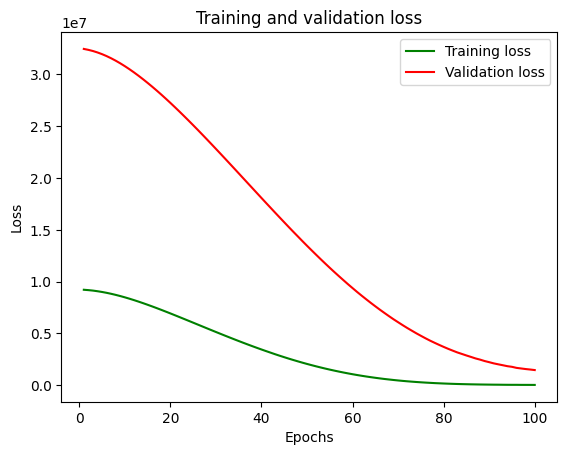

In [ ]:
# Plot the training and validation loss over the epochs
train_loss_LSTM = model_LSTM.history.history['loss']
val_loss_LSTM = model_LSTM.history.history['val_loss']
epochs = range(1, len(train_loss_LSTM) + 1)

plt.plot(epochs, train_loss_LSTM, color='green', label='Training loss')
plt.plot(epochs, val_loss_LSTM, color='red', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
#plt.show()
p_path = plot_path + 'LSTM/loss/OHE/loss_load_weather_OHE_LSTM_100E_32B_EL-3.png'
plt.savefig(p_path)

In [ ]:
model_LSTM.fit(X_train_val, X_train_val, validation_data=(X_test_local, y_test_local), epochs=epochs_LSTM, batch_size=batch_size_LSTM, verbose=2, callbacks=[cp_LSTM])

In [ ]:
# Plot the training and validation loss over the epochs
train_val_loss_LSTM = model_LSTM.history.history['loss']
test_loss_LSTM = model_LSTM.history.history['val_loss']
epochs = range(1, len(train_val_loss_LSTM) + 1)

plt.plot(epochs, train_val_loss_LSTM, color='green', label='Training loss')
plt.plot(epochs, test_loss_LSTM, color='red', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
#plt.show()
p_path = plot_path + 'LSTM/loss_2/OHE/loss_load_weather_LSTM_100E_32B_EL-5_2.png'
plt.savefig(p_path)

In [ ]:
model_LSTM.fit(X_train_val_test, y_train_val_test, validation_data=(X_test, y_test), epochs=epochs_LSTM, batch_size=batch_size_LSTM, verbose=2, callbacks=[cp_LSTM])

In [ ]:
test_predictions_LSTM = model_LSTM.predict(X_test).flatten()
y_test = y_test.flatten()
results_test_LSTM = pd.DataFrame(data={'Predictions':test_predictions_LSTM, 'Actuals':y_test})

### LSTM Plots&Results

In [ ]:
# Obtain the scaling parameters (min and max) used during normalization
min_value = scaler.data_min_[0]
max_value = scaler.data_max_[0]

# Denormalize the normalized values
results_test_LSTM['Predictions'] = scaler.inverse_transform(results_test_LSTM[['Predictions']])
results_test_LSTM['Actuals'] = scaler.inverse_transform(results_test_LSTM[['Actuals']])

In [ ]:
timestamps = pd.date_range(end="2013-12-31 23:00:00", periods=1749, freq="1H")
results_test_LSTM.insert(0, 'Date', timestamps)
results_test_LSTM = results_test_LSTM.set_index("Date")
r_path = results_path + 'results_test_load_weather_LSTM.csv'
results_test_LSTM.to_csv(r_path)

In [ ]:
#r_path = results_path + 'results_test_load_weather_LSTM.csv'
#results_test_LSTM = pd.read_csv(r_path)
#results_test_LSTM['Date'] = pd.to_datetime(results_test_LSTM_1['Date'])
#results_test_LSTM = results_test_LSTM.set_index("Date")
#results_test_LSTM

In [ ]:
plt.plot(results_test_LSTM['Actuals'], label='Actuals')
plt.plot(results_test_LSTM['Predictions'], label='Predictions')
plt.xticks(rotation='vertical')
plt.locator_params(axis='x', nbins=20)
plt.legend()
plt.title('Predictions - Actual values')
p_path = plot_path + 'LSTM/results_test_load_weather_LSTM.png'
plt.savefig(p_path)

In [ ]:
results_test_day_LSTM = results_test_LSTM.loc['2013-12-04']
plt.plot(results_test_day_LSTM['Actuals'], label='Actuals')
plt.plot(results_test_day_LSTM['Predictions'], label='Predictions')
plt.xticks(rotation='vertical')
plt.locator_params(axis='x', nbins=20)
plt.legend()
plt.title('Predictions - Actual values')
p_path = plot_path + 'LSTM/results_test_load_weather_1204_LSTM.png'
plt.savefig(p_path)

In [ ]:
# Calculate the root mean squared error and mae of the predictions
mse_LSTM = mean_squared_error(results_test_LSTM['Actuals'], results_test_LSTM['Predictions'])
mae_LSTM = mean_absolute_error(results_test_LSTM['Actuals'], results_test_LSTM['Predictions'])
rmse_LSTM = math.sqrt(mse_LSTM)
print('mse LSTM : ' + str(mse_LSTM))
print('mae LSTM: ' + str(mae_LSTM))
print('rmse LSTM: ' + str(rmse_LSTM))

----------------------------------------------------------------------------------------------------


**Predictions**


In [ ]:
results_LSTM = model_LSTM.predict(X1).flatten()
y1 = y1.flatten()
results_LSTM = pd.DataFrame(data={'Predictions':results_LSTM, 'Actuals':y1})

In [ ]:
# Obtain the scaling parameters (min and max) used during normalization
min_value = scaler.data_min_[0]
max_value = scaler.data_max_[0]

# Denormalize the normalized values
results_LSTM['Predictions'] = scaler.inverse_transform(results_LSTM[['Predictions']])
results_LSTM['Actuals'] = scaler.inverse_transform(results_LSTM[['Actuals']])

In [ ]:
timestamps = pd.date_range(start="2013-01-01 4:00:00", periods=8757, freq="1H")
results_LSTM.insert(0, 'Date', timestamps)
results_LSTM = results_LSTM.set_index("Date")
r_path = results_path + 'results_load_weather_LSTM.csv'
results_LSTM.to_csv(r_path)

In [ ]:
#r_path = results_path + 'results_load_weather_LSTM.csv'
#results_LSTM.to_csv(r_path)
#results_LSTM = read_csv(r_path)
#results_LSTM['Date'] = pd.to_datetime(results_LSTM_1['Date'])
#results_LSTM = results_LSTM.set_index("Date")
#results_LSTM

In [ ]:
plt.plot(results_LSTM['Actuals'], label='Actuals')
plt.plot(results_LSTM['Predictions'], label='Predictions')
plt.legend()
plt.title('Predictions - Actual values')
p_path = plot_path + 'LSTM/results_load_weather_LSTM.png'
plt.savefig(p_path)

In [ ]:
# Prediction of one day winter
results_day_LSTM = results_LSTM.loc['2013-01-15']
plt.plot( results_day_LSTM['Actuals'], label='Actual')
plt.plot(results_day_LSTM['Predictions'], label='Predictions')
plt.legend()
plt.xticks(rotation='vertical')
plt.title('Predictions - Actual Values')
p_path = plot_path + 'LSTM/results_load_weather_LSTM_winter.png'
plt.savefig(p_path)

In [ ]:
# Prediction of one day spring
results_day_LSTM = results_LSTM.loc['2013-04-15']
plt.plot( results_day_LSTM['Actuals'], label='Actual')
plt.plot(results_day_LSTM['Predictions'], label='Predictions')
plt.legend()
plt.xticks(rotation='vertical')
plt.title('Predictions - Actual Values')
p_path = plot_path + 'LSTM/results_load_weather_LSTM_spring.png'
plt.savefig(p_path)

In [ ]:
# Prediction of one day summer
results_day_LSTM = results_LSTM.loc['2013-07-15']
plt.plot( results_day_LSTM['Actuals'], label='Actual')
plt.plot(results_day_LSTM['Predictions'], label='Predictions')
plt.legend()
plt.xticks(rotation='vertical')
plt.title('Predictions - Actual Values')
p_path = plot_path + 'LSTM/results_load_weather_LSTM_summer.png'
plt.savefig(p_path)

In [ ]:
# Prediction of one day autumn
results_day_LSTM = results_LSTM.loc['2013-10-15']
plt.plot( results_day_LSTM['Actuals'], label='Actual')
plt.plot(results_day_LSTM['Predictions'], label='Predictions')
plt.legend()
plt.xticks(rotation='vertical')
plt.title('Predictions - Actual Values')
p_path = plot_path + 'LSTM/results_load_weather_LSTM_autumn.png'
plt.savefig(p_path)

In [ ]:
# Calculate the root mean squared error and mae of the predictions
mse_LSTM = mean_squared_error(results_LSTM['Actuals'], results_LSTM['Predictions'])
mae_LSTM = mean_absolute_error(results_LSTM['Actuals'], results_LSTM['Predictions'])
rmse_LSTM = math.sqrt(mse_LSTM)
print('mse LSTM : ' + str(mse_LSTM))
print('mae LSTM: ' + str(mae_LSTM))
print('rmse LSTM: ' + str(rmse_LSTM))

### GRU

In [ ]:
learning_rate_GRU = 0.000001
epochs_GRU = 100
batch_size_GRU = 32

In [ ]:
model_GRU = Sequential()
model_GRU.add(InputLayer((3, 4)))
model_GRU.add(GRU(64))
model_GRU.add(Dense(8, 'relu'))
model_GRU.add(Dense(1, 'linear'))
model_GRU.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, 64)                13440     
                                                                 
 dense_16 (Dense)            (None, 8)                 520       
                                                                 
 dense_17 (Dense)            (None, 1)                 9         
                                                                 
Total params: 13,969
Trainable params: 13,969
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cp_GRU = ModelCheckpoint('/content/gdrive/MyDrive/Tesi/data/Dati/models/load_weather/model_GRU/', save_best_only=True)
model_GRU.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=learning_rate_GRU), metrics=[RootMeanSquaredError()])

In [ ]:
model_GRU.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs_GRU, batch_size=batch_size_GRU, verbose=2, callbacks=[cp_GRU])

Epoch 1/100


165/165 - 9s - loss: 0.1187 - root_mean_squared_error: 0.3446 - val_loss: 0.1253 - val_root_mean_squared_error: 0.3540 - 9s/epoch - 56ms/step
Epoch 2/100


165/165 - 5s - loss: 0.1083 - root_mean_squared_error: 0.3291 - val_loss: 0.1130 - val_root_mean_squared_error: 0.3362 - 5s/epoch - 28ms/step
Epoch 3/100


165/165 - 5s - loss: 0.0986 - root_mean_squared_error: 0.3141 - val_loss: 0.1017 - val_root_mean_squared_error: 0.3189 - 5s/epoch - 27ms/step
Epoch 4/100


165/165 - 6s - loss: 0.0897 - root_mean_squared_error: 0.2995 - val_loss: 0.0914 - val_root_mean_squared_error: 0.3022 - 6s/epoch - 35ms/step
Epoch 5/100


165/165 - 5s - loss: 0.0815 - root_mean_squared_error: 0.2855 - val_loss: 0.0818 - val_root_mean_squared_error: 0.2861 - 5s/epoch - 33ms/step
Epoch 6/100


165/165 - 5s - loss: 0.0739 - root_mean_squared_error: 0.2719 - val_loss: 0.0731 - val_root_mean_squared_error: 0.2704 - 5s/epoch - 30ms/step
Epoch 7/100


165/165 - 6s - loss: 0.0670 - root_mean_squared_error: 0.2589 - val_loss: 0.0651 - val_root_mean_squared_error: 0.2551 - 6s/epoch - 34ms/step
Epoch 8/100


165/165 - 5s - loss: 0.0607 - root_mean_squared_error: 0.2464 - val_loss: 0.0578 - val_root_mean_squared_error: 0.2405 - 5s/epoch - 32ms/step
Epoch 9/100


165/165 - 6s - loss: 0.0550 - root_mean_squared_error: 0.2345 - val_loss: 0.0513 - val_root_mean_squared_error: 0.2265 - 6s/epoch - 35ms/step
Epoch 10/100


165/165 - 5s - loss: 0.0497 - root_mean_squared_error: 0.2230 - val_loss: 0.0453 - val_root_mean_squared_error: 0.2129 - 5s/epoch - 28ms/step
Epoch 11/100


165/165 - 5s - loss: 0.0450 - root_mean_squared_error: 0.2122 - val_loss: 0.0400 - val_root_mean_squared_error: 0.2000 - 5s/epoch - 32ms/step
Epoch 12/100


165/165 - 6s - loss: 0.0408 - root_mean_squared_error: 0.2019 - val_loss: 0.0352 - val_root_mean_squared_error: 0.1877 - 6s/epoch - 35ms/step
Epoch 13/100


165/165 - 5s - loss: 0.0370 - root_mean_squared_error: 0.1923 - val_loss: 0.0310 - val_root_mean_squared_error: 0.1759 - 5s/epoch - 27ms/step
Epoch 14/100


165/165 - 6s - loss: 0.0336 - root_mean_squared_error: 0.1832 - val_loss: 0.0272 - val_root_mean_squared_error: 0.1649 - 6s/epoch - 36ms/step
Epoch 15/100


165/165 - 5s - loss: 0.0305 - root_mean_squared_error: 0.1748 - val_loss: 0.0239 - val_root_mean_squared_error: 0.1545 - 5s/epoch - 32ms/step
Epoch 16/100


165/165 - 5s - loss: 0.0279 - root_mean_squared_error: 0.1670 - val_loss: 0.0210 - val_root_mean_squared_error: 0.1449 - 5s/epoch - 28ms/step
Epoch 17/100


165/165 - 7s - loss: 0.0256 - root_mean_squared_error: 0.1600 - val_loss: 0.0185 - val_root_mean_squared_error: 0.1361 - 7s/epoch - 40ms/step
Epoch 18/100


165/165 - 5s - loss: 0.0236 - root_mean_squared_error: 0.1536 - val_loss: 0.0164 - val_root_mean_squared_error: 0.1281 - 5s/epoch - 28ms/step
Epoch 19/100


165/165 - 5s - loss: 0.0219 - root_mean_squared_error: 0.1479 - val_loss: 0.0146 - val_root_mean_squared_error: 0.1209 - 5s/epoch - 28ms/step
Epoch 20/100


165/165 - 7s - loss: 0.0204 - root_mean_squared_error: 0.1429 - val_loss: 0.0131 - val_root_mean_squared_error: 0.1145 - 7s/epoch - 45ms/step
Epoch 21/100


165/165 - 6s - loss: 0.0192 - root_mean_squared_error: 0.1386 - val_loss: 0.0119 - val_root_mean_squared_error: 0.1091 - 6s/epoch - 36ms/step
Epoch 22/100


165/165 - 7s - loss: 0.0182 - root_mean_squared_error: 0.1349 - val_loss: 0.0109 - val_root_mean_squared_error: 0.1045 - 7s/epoch - 42ms/step
Epoch 23/100


165/165 - 5s - loss: 0.0174 - root_mean_squared_error: 0.1318 - val_loss: 0.0101 - val_root_mean_squared_error: 0.1006 - 5s/epoch - 28ms/step
Epoch 24/100


165/165 - 5s - loss: 0.0167 - root_mean_squared_error: 0.1292 - val_loss: 0.0095 - val_root_mean_squared_error: 0.0976 - 5s/epoch - 33ms/step
Epoch 25/100


165/165 - 6s - loss: 0.0162 - root_mean_squared_error: 0.1272 - val_loss: 0.0091 - val_root_mean_squared_error: 0.0953 - 6s/epoch - 34ms/step
Epoch 26/100


165/165 - 5s - loss: 0.0158 - root_mean_squared_error: 0.1256 - val_loss: 0.0087 - val_root_mean_squared_error: 0.0935 - 5s/epoch - 28ms/step
Epoch 27/100


165/165 - 6s - loss: 0.0155 - root_mean_squared_error: 0.1244 - val_loss: 0.0085 - val_root_mean_squared_error: 0.0922 - 6s/epoch - 38ms/step
Epoch 28/100


165/165 - 5s - loss: 0.0152 - root_mean_squared_error: 0.1234 - val_loss: 0.0084 - val_root_mean_squared_error: 0.0914 - 5s/epoch - 30ms/step
Epoch 29/100


165/165 - 5s - loss: 0.0151 - root_mean_squared_error: 0.1227 - val_loss: 0.0083 - val_root_mean_squared_error: 0.0908 - 5s/epoch - 28ms/step
Epoch 30/100


165/165 - 6s - loss: 0.0149 - root_mean_squared_error: 0.1222 - val_loss: 0.0082 - val_root_mean_squared_error: 0.0905 - 6s/epoch - 39ms/step
Epoch 31/100


165/165 - 5s - loss: 0.0149 - root_mean_squared_error: 0.1219 - val_loss: 0.0082 - val_root_mean_squared_error: 0.0903 - 5s/epoch - 28ms/step
Epoch 32/100


165/165 - 5s - loss: 0.0148 - root_mean_squared_error: 0.1216 - val_loss: 0.0081 - val_root_mean_squared_error: 0.0903 - 5s/epoch - 27ms/step
Epoch 33/100


165/165 - 6s - loss: 0.0147 - root_mean_squared_error: 0.1214 - val_loss: 0.0081 - val_root_mean_squared_error: 0.0902 - 6s/epoch - 35ms/step
Epoch 34/100
165/165 - 1s - loss: 0.0147 - root_mean_squared_error: 0.1213 - val_loss: 0.0081 - val_root_mean_squared_error: 0.0902 - 702ms/epoch - 4ms/step
Epoch 35/100
165/165 - 1s - loss: 0.0147 - root_mean_squared_error: 0.1212 - val_loss: 0.0081 - val_root_mean_squared_error: 0.0903 - 677ms/epoch - 4ms/step
Epoch 36/100
165/165 - 1s - loss: 0.0147 - root_mean_squared_error: 0.1211 - val_loss: 0.0081 - val_root_mean_squared_error: 0.0903 - 650ms/epoch - 4ms/step
Epoch 37/100
165/165 - 1s - loss: 0.0146 - root_mean_squared_error: 0.1210 - val_loss: 0.0081 - val_root_mean_squared_error: 0.0903 - 688ms/epoch - 4ms/step
Epoch 38/100
165/165 - 1s - loss: 0.0146 - root_mean_squared_error: 0.1209 - val_loss: 0.0081 - val_root_mean_squared_error: 0.0903 - 703ms/epoch - 4ms/step
Epoch 39/100


165/165 - 6s - loss: 0.0146 - root_mean_squared_error: 0.1208 - val_loss: 0.0081 - val_root_mean_squared_error: 0.0902 - 6s/epoch - 35ms/step
Epoch 40/100


165/165 - 6s - loss: 0.0146 - root_mean_squared_error: 0.1207 - val_loss: 0.0081 - val_root_mean_squared_error: 0.0902 - 6s/epoch - 34ms/step
Epoch 41/100


165/165 - 5s - loss: 0.0145 - root_mean_squared_error: 0.1206 - val_loss: 0.0081 - val_root_mean_squared_error: 0.0901 - 5s/epoch - 28ms/step
Epoch 42/100


165/165 - 7s - loss: 0.0145 - root_mean_squared_error: 0.1205 - val_loss: 0.0081 - val_root_mean_squared_error: 0.0901 - 7s/epoch - 40ms/step
Epoch 43/100


165/165 - 5s - loss: 0.0145 - root_mean_squared_error: 0.1204 - val_loss: 0.0081 - val_root_mean_squared_error: 0.0901 - 5s/epoch - 29ms/step
Epoch 44/100


165/165 - 5s - loss: 0.0145 - root_mean_squared_error: 0.1204 - val_loss: 0.0081 - val_root_mean_squared_error: 0.0900 - 5s/epoch - 28ms/step
Epoch 45/100


165/165 - 6s - loss: 0.0145 - root_mean_squared_error: 0.1203 - val_loss: 0.0081 - val_root_mean_squared_error: 0.0900 - 6s/epoch - 39ms/step
Epoch 46/100


165/165 - 5s - loss: 0.0144 - root_mean_squared_error: 0.1202 - val_loss: 0.0081 - val_root_mean_squared_error: 0.0899 - 5s/epoch - 28ms/step
Epoch 47/100


165/165 - 5s - loss: 0.0144 - root_mean_squared_error: 0.1201 - val_loss: 0.0081 - val_root_mean_squared_error: 0.0899 - 5s/epoch - 29ms/step
Epoch 48/100


165/165 - 6s - loss: 0.0144 - root_mean_squared_error: 0.1200 - val_loss: 0.0081 - val_root_mean_squared_error: 0.0898 - 6s/epoch - 39ms/step
Epoch 49/100
165/165 - 1s - loss: 0.0144 - root_mean_squared_error: 0.1199 - val_loss: 0.0081 - val_root_mean_squared_error: 0.0898 - 696ms/epoch - 4ms/step
Epoch 50/100


165/165 - 5s - loss: 0.0144 - root_mean_squared_error: 0.1198 - val_loss: 0.0080 - val_root_mean_squared_error: 0.0897 - 5s/epoch - 28ms/step
Epoch 51/100


165/165 - 6s - loss: 0.0143 - root_mean_squared_error: 0.1197 - val_loss: 0.0080 - val_root_mean_squared_error: 0.0897 - 6s/epoch - 35ms/step
Epoch 52/100


165/165 - 5s - loss: 0.0143 - root_mean_squared_error: 0.1197 - val_loss: 0.0080 - val_root_mean_squared_error: 0.0896 - 5s/epoch - 33ms/step
Epoch 53/100


165/165 - 5s - loss: 0.0143 - root_mean_squared_error: 0.1196 - val_loss: 0.0080 - val_root_mean_squared_error: 0.0896 - 5s/epoch - 28ms/step
Epoch 54/100


165/165 - 6s - loss: 0.0143 - root_mean_squared_error: 0.1195 - val_loss: 0.0080 - val_root_mean_squared_error: 0.0895 - 6s/epoch - 35ms/step
Epoch 55/100
165/165 - 1s - loss: 0.0143 - root_mean_squared_error: 0.1194 - val_loss: 0.0080 - val_root_mean_squared_error: 0.0895 - 702ms/epoch - 4ms/step
Epoch 56/100


165/165 - 5s - loss: 0.0142 - root_mean_squared_error: 0.1194 - val_loss: 0.0080 - val_root_mean_squared_error: 0.0894 - 5s/epoch - 28ms/step
Epoch 57/100


165/165 - 7s - loss: 0.0142 - root_mean_squared_error: 0.1193 - val_loss: 0.0080 - val_root_mean_squared_error: 0.0894 - 7s/epoch - 41ms/step
Epoch 58/100


165/165 - 5s - loss: 0.0142 - root_mean_squared_error: 0.1192 - val_loss: 0.0080 - val_root_mean_squared_error: 0.0893 - 5s/epoch - 28ms/step
Epoch 59/100


165/165 - 5s - loss: 0.0142 - root_mean_squared_error: 0.1191 - val_loss: 0.0080 - val_root_mean_squared_error: 0.0892 - 5s/epoch - 28ms/step
Epoch 60/100


165/165 - 6s - loss: 0.0142 - root_mean_squared_error: 0.1191 - val_loss: 0.0080 - val_root_mean_squared_error: 0.0892 - 6s/epoch - 39ms/step
Epoch 61/100


165/165 - 5s - loss: 0.0142 - root_mean_squared_error: 0.1190 - val_loss: 0.0079 - val_root_mean_squared_error: 0.0891 - 5s/epoch - 28ms/step
Epoch 62/100
165/165 - 1s - loss: 0.0141 - root_mean_squared_error: 0.1189 - val_loss: 0.0079 - val_root_mean_squared_error: 0.0892 - 703ms/epoch - 4ms/step
Epoch 63/100


165/165 - 5s - loss: 0.0141 - root_mean_squared_error: 0.1189 - val_loss: 0.0079 - val_root_mean_squared_error: 0.0891 - 5s/epoch - 32ms/step
Epoch 64/100


165/165 - 6s - loss: 0.0141 - root_mean_squared_error: 0.1188 - val_loss: 0.0079 - val_root_mean_squared_error: 0.0891 - 6s/epoch - 36ms/step
Epoch 65/100


165/165 - 5s - loss: 0.0141 - root_mean_squared_error: 0.1187 - val_loss: 0.0079 - val_root_mean_squared_error: 0.0890 - 5s/epoch - 28ms/step
Epoch 66/100


165/165 - 6s - loss: 0.0141 - root_mean_squared_error: 0.1187 - val_loss: 0.0079 - val_root_mean_squared_error: 0.0890 - 6s/epoch - 36ms/step
Epoch 67/100


165/165 - 5s - loss: 0.0141 - root_mean_squared_error: 0.1186 - val_loss: 0.0079 - val_root_mean_squared_error: 0.0890 - 5s/epoch - 33ms/step
Epoch 68/100


165/165 - 5s - loss: 0.0141 - root_mean_squared_error: 0.1186 - val_loss: 0.0079 - val_root_mean_squared_error: 0.0889 - 5s/epoch - 31ms/step
Epoch 69/100


165/165 - 6s - loss: 0.0140 - root_mean_squared_error: 0.1185 - val_loss: 0.0079 - val_root_mean_squared_error: 0.0889 - 6s/epoch - 34ms/step
Epoch 70/100


165/165 - 6s - loss: 0.0140 - root_mean_squared_error: 0.1185 - val_loss: 0.0079 - val_root_mean_squared_error: 0.0888 - 6s/epoch - 34ms/step
Epoch 71/100


165/165 - 6s - loss: 0.0140 - root_mean_squared_error: 0.1184 - val_loss: 0.0079 - val_root_mean_squared_error: 0.0888 - 6s/epoch - 35ms/step
Epoch 72/100


165/165 - 5s - loss: 0.0140 - root_mean_squared_error: 0.1184 - val_loss: 0.0079 - val_root_mean_squared_error: 0.0888 - 5s/epoch - 28ms/step
Epoch 73/100


165/165 - 4s - loss: 0.0140 - root_mean_squared_error: 0.1183 - val_loss: 0.0079 - val_root_mean_squared_error: 0.0888 - 4s/epoch - 27ms/step
Epoch 74/100


165/165 - 7s - loss: 0.0140 - root_mean_squared_error: 0.1182 - val_loss: 0.0079 - val_root_mean_squared_error: 0.0887 - 7s/epoch - 40ms/step
Epoch 75/100


165/165 - 6s - loss: 0.0140 - root_mean_squared_error: 0.1182 - val_loss: 0.0079 - val_root_mean_squared_error: 0.0887 - 6s/epoch - 35ms/step
Epoch 76/100


165/165 - 5s - loss: 0.0140 - root_mean_squared_error: 0.1181 - val_loss: 0.0079 - val_root_mean_squared_error: 0.0886 - 5s/epoch - 33ms/step
Epoch 77/100


165/165 - 6s - loss: 0.0139 - root_mean_squared_error: 0.1181 - val_loss: 0.0078 - val_root_mean_squared_error: 0.0886 - 6s/epoch - 35ms/step
Epoch 78/100


165/165 - 5s - loss: 0.0139 - root_mean_squared_error: 0.1180 - val_loss: 0.0078 - val_root_mean_squared_error: 0.0885 - 5s/epoch - 28ms/step
Epoch 79/100


165/165 - 6s - loss: 0.0139 - root_mean_squared_error: 0.1180 - val_loss: 0.0078 - val_root_mean_squared_error: 0.0885 - 6s/epoch - 35ms/step
Epoch 80/100


165/165 - 5s - loss: 0.0139 - root_mean_squared_error: 0.1179 - val_loss: 0.0078 - val_root_mean_squared_error: 0.0885 - 5s/epoch - 33ms/step
Epoch 81/100


165/165 - 5s - loss: 0.0139 - root_mean_squared_error: 0.1179 - val_loss: 0.0078 - val_root_mean_squared_error: 0.0884 - 5s/epoch - 31ms/step
Epoch 82/100
165/165 - 1s - loss: 0.0139 - root_mean_squared_error: 0.1179 - val_loss: 0.0078 - val_root_mean_squared_error: 0.0884 - 954ms/epoch - 6ms/step
Epoch 83/100


165/165 - 5s - loss: 0.0139 - root_mean_squared_error: 0.1178 - val_loss: 0.0078 - val_root_mean_squared_error: 0.0884 - 5s/epoch - 32ms/step
Epoch 84/100


165/165 - 5s - loss: 0.0139 - root_mean_squared_error: 0.1178 - val_loss: 0.0078 - val_root_mean_squared_error: 0.0884 - 5s/epoch - 33ms/step
Epoch 85/100


165/165 - 6s - loss: 0.0139 - root_mean_squared_error: 0.1177 - val_loss: 0.0078 - val_root_mean_squared_error: 0.0883 - 6s/epoch - 36ms/step
Epoch 86/100


165/165 - 5s - loss: 0.0138 - root_mean_squared_error: 0.1177 - val_loss: 0.0078 - val_root_mean_squared_error: 0.0882 - 5s/epoch - 28ms/step
Epoch 87/100


165/165 - 5s - loss: 0.0138 - root_mean_squared_error: 0.1177 - val_loss: 0.0078 - val_root_mean_squared_error: 0.0882 - 5s/epoch - 28ms/step
Epoch 88/100


165/165 - 7s - loss: 0.0138 - root_mean_squared_error: 0.1176 - val_loss: 0.0078 - val_root_mean_squared_error: 0.0882 - 7s/epoch - 40ms/step
Epoch 89/100


165/165 - 5s - loss: 0.0138 - root_mean_squared_error: 0.1176 - val_loss: 0.0078 - val_root_mean_squared_error: 0.0881 - 5s/epoch - 28ms/step
Epoch 90/100
165/165 - 1s - loss: 0.0138 - root_mean_squared_error: 0.1175 - val_loss: 0.0078 - val_root_mean_squared_error: 0.0882 - 717ms/epoch - 4ms/step
Epoch 91/100


165/165 - 6s - loss: 0.0138 - root_mean_squared_error: 0.1175 - val_loss: 0.0078 - val_root_mean_squared_error: 0.0881 - 6s/epoch - 35ms/step
Epoch 92/100


165/165 - 5s - loss: 0.0138 - root_mean_squared_error: 0.1175 - val_loss: 0.0078 - val_root_mean_squared_error: 0.0881 - 5s/epoch - 33ms/step
Epoch 93/100


165/165 - 5s - loss: 0.0138 - root_mean_squared_error: 0.1174 - val_loss: 0.0077 - val_root_mean_squared_error: 0.0880 - 5s/epoch - 28ms/step
Epoch 94/100


165/165 - 6s - loss: 0.0138 - root_mean_squared_error: 0.1174 - val_loss: 0.0077 - val_root_mean_squared_error: 0.0880 - 6s/epoch - 35ms/step
Epoch 95/100


165/165 - 5s - loss: 0.0138 - root_mean_squared_error: 0.1174 - val_loss: 0.0077 - val_root_mean_squared_error: 0.0880 - 5s/epoch - 32ms/step
Epoch 96/100


165/165 - 5s - loss: 0.0138 - root_mean_squared_error: 0.1173 - val_loss: 0.0077 - val_root_mean_squared_error: 0.0879 - 5s/epoch - 32ms/step
Epoch 97/100


165/165 - 5s - loss: 0.0138 - root_mean_squared_error: 0.1173 - val_loss: 0.0077 - val_root_mean_squared_error: 0.0879 - 5s/epoch - 32ms/step
Epoch 98/100


165/165 - 5s - loss: 0.0138 - root_mean_squared_error: 0.1173 - val_loss: 0.0077 - val_root_mean_squared_error: 0.0878 - 5s/epoch - 33ms/step
Epoch 99/100
165/165 - 1s - loss: 0.0137 - root_mean_squared_error: 0.1172 - val_loss: 0.0077 - val_root_mean_squared_error: 0.0878 - 722ms/epoch - 4ms/step
Epoch 100/100


165/165 - 6s - loss: 0.0137 - root_mean_squared_error: 0.1172 - val_loss: 0.0077 - val_root_mean_squared_error: 0.0878 - 6s/epoch - 35ms/step


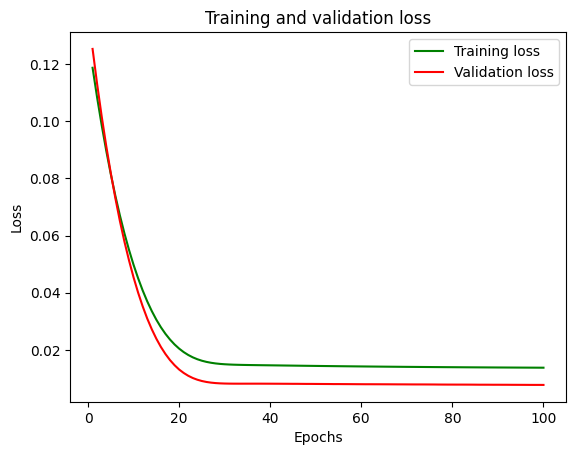

In [ ]:
# Plot the training and validation loss over the epochs
train_loss_GRU = model_GRU.history.history['loss']
val_loss_GRU = model_GRU.history.history['val_loss']
epochs = range(1, len(train_loss_GRU) + 1)

plt.plot(epochs, train_loss_GRU, color='green', label='Training loss')
plt.plot(epochs, val_loss_GRU, color='red', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
#plt.show()
p_path = plot_path + 'GRU/loss/loss_load_weather_GRU_100E_32B_EL-6_2.png'
#plt.savefig(p_path)

In [ ]:
model_GRU.fit(X_train_val, y_train_val, validation_data=(X_test_local, y_test_local), epochs=epochs_GRU, batch_size=batch_size_GRU, verbose=2, callbacks=[cp_GRU])

Epoch 1/100
192/192 - 1s - loss: 0.0129 - root_mean_squared_error: 0.1134 - val_loss: 0.0142 - val_root_mean_squared_error: 0.1192 - 821ms/epoch - 4ms/step
Epoch 2/100
192/192 - 1s - loss: 0.0129 - root_mean_squared_error: 0.1134 - val_loss: 0.0142 - val_root_mean_squared_error: 0.1191 - 767ms/epoch - 4ms/step
Epoch 3/100
192/192 - 1s - loss: 0.0129 - root_mean_squared_error: 0.1134 - val_loss: 0.0142 - val_root_mean_squared_error: 0.1192 - 780ms/epoch - 4ms/step
Epoch 4/100
192/192 - 1s - loss: 0.0128 - root_mean_squared_error: 0.1133 - val_loss: 0.0142 - val_root_mean_squared_error: 0.1191 - 798ms/epoch - 4ms/step
Epoch 5/100
192/192 - 1s - loss: 0.0128 - root_mean_squared_error: 0.1133 - val_loss: 0.0142 - val_root_mean_squared_error: 0.1192 - 790ms/epoch - 4ms/step
Epoch 6/100
192/192 - 1s - loss: 0.0128 - root_mean_squared_error: 0.1133 - val_loss: 0.0142 - val_root_mean_squared_error: 0.1192 - 771ms/epoch - 4ms/step
Epoch 7/100
192/192 - 1s - loss: 0.0128 - root_mean_squared_erro

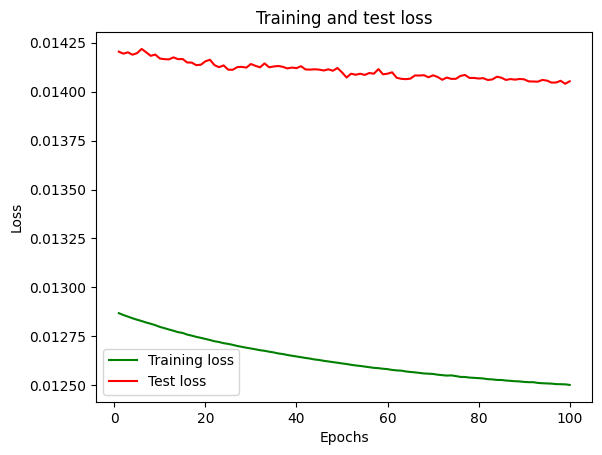

In [ ]:
# Plot the training and validation loss over the epochs
train_val_loss_GRU = model_GRU.history.history['loss']
test_loss_GRU = model_GRU.history.history['val_loss']
epochs = range(1, len(train_val_loss_GRU) + 1)

plt.plot(epochs, train_val_loss_GRU, color='green', label='Training loss')
plt.plot(epochs, test_loss_GRU, color='red', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
p_path = plot_path + 'GRU/loss_2/loss_load_weather_GRU_100E_32B_EL-6_2.png'
plt.savefig(p_path)

In [ ]:
model_GRU.fit(X_train_val_test, y_train_val_test, validation_data=(X_test, y_test), epochs=epochs_GRU, batch_size=batch_size_GRU, verbose=2, callbacks=[cp_GRU])

Epoch 1/100
219/219 - 1s - loss: 0.0127 - root_mean_squared_error: 0.1127 - val_loss: 0.0184 - val_root_mean_squared_error: 0.1355 - 1s/epoch - 7ms/step
Epoch 2/100
219/219 - 1s - loss: 0.0127 - root_mean_squared_error: 0.1126 - val_loss: 0.0184 - val_root_mean_squared_error: 0.1355 - 1s/epoch - 6ms/step
Epoch 3/100
219/219 - 1s - loss: 0.0127 - root_mean_squared_error: 0.1126 - val_loss: 0.0184 - val_root_mean_squared_error: 0.1355 - 1s/epoch - 7ms/step
Epoch 4/100
219/219 - 1s - loss: 0.0127 - root_mean_squared_error: 0.1126 - val_loss: 0.0184 - val_root_mean_squared_error: 0.1355 - 1s/epoch - 5ms/step
Epoch 5/100
219/219 - 1s - loss: 0.0127 - root_mean_squared_error: 0.1126 - val_loss: 0.0184 - val_root_mean_squared_error: 0.1355 - 927ms/epoch - 4ms/step
Epoch 6/100
219/219 - 1s - loss: 0.0127 - root_mean_squared_error: 0.1126 - val_loss: 0.0184 - val_root_mean_squared_error: 0.1355 - 984ms/epoch - 4ms/step
Epoch 7/100
219/219 - 1s - loss: 0.0127 - root_mean_squared_error: 0.1126 - 

In [ ]:
test_predictions_GRU = model_GRU.predict(X_test).flatten().tolist()
y_test = y_test.flatten()
results_test_GRU = pd.DataFrame(data={'Predictions':test_predictions_GRU, 'Actuals':y_test})

55/55 [==============================] - 1s 2ms/step


### GRU Plots&Results

In [ ]:
# Obtain the scaling parameters (min and max) used during normalization
min_value = scaler.data_min_[0]
max_value = scaler.data_max_[0]

# Denormalize the selected column
results_test_GRU['Predictions'] = scaler.inverse_transform(results_test_GRU[['Predictions']])
results_test_GRU['Actuals'] = scaler.inverse_transform(results_test_GRU[['Actuals']])

In [ ]:
timestamps = pd.date_range(end="2013-12-31 23:00:00", periods=1749, freq="1H")
results_test_GRU.insert(0, 'Date', timestamps)
results_test_GRU = results_test_GRU.set_index("Date")
r_path = results_path + 'results_test_load_weather_GRU.csv'
results_test_GRU.to_csv(r_path)

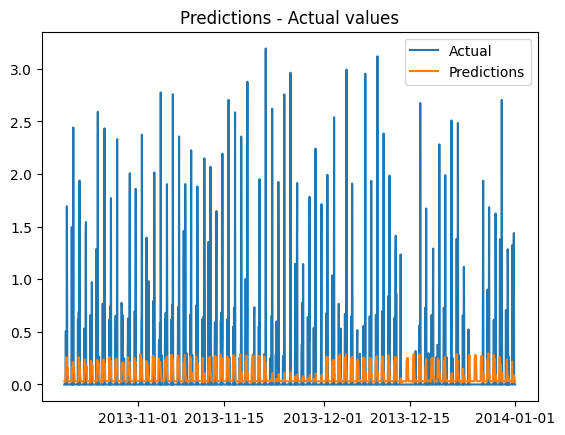

In [ ]:
plt.plot(results_test_GRU['Actuals'], label='Actual')
plt.plot(results_test_GRU['Predictions'], label='Predictions')
plt.legend()
plt.title('Predictions - Actual values')
p_path = plot_path + 'GRU/results_test_load_weather_GRU.png'
plt.savefig(p_path)

<ipython-input-59-12aaaafeec30>:5: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.dates.AutoDateLocator'>
  plt.locator_params(axis='x', nbins=20)


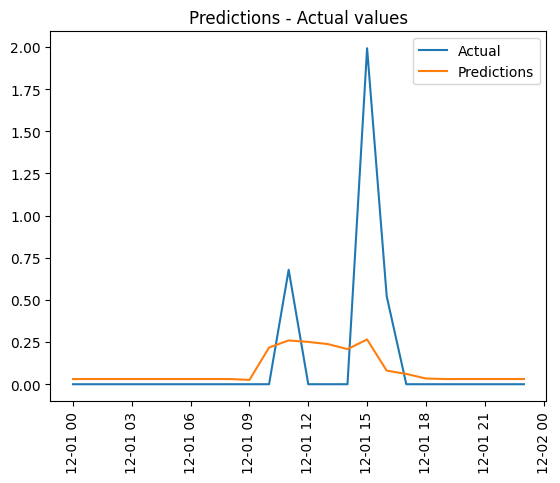

In [ ]:
results_test_day_GRU = results_test_GRU.loc['2013-12-01']
plt.plot(results_test_day_GRU['Actuals'], label='Actual')
plt.plot(results_test_day_GRU['Predictions'], label='Predictions')
plt.xticks(rotation='vertical')
plt.locator_params(axis='x', nbins=20)
plt.legend()
plt.title('Predictions - Actual values')
p_path = plot_path + 'GRU/results_test_load_weather_1201_GRU.png'
plt.savefig(p_path)

In [ ]:
mse_GRU = mean_squared_error(results_test_GRU['Actuals'], results_test_GRU['Predictions'])
mae_GRU = mean_absolute_error(results_test_GRU['Actuals'], results_test_GRU['Predictions'])
rmse_GRU = math.sqrt(mse_GRU)
print('mse GRU: ' + str(mse_GRU))
print('mae GRU: ' + str(mae_GRU))
print('rmse GRU: ' + str(rmse_GRU))

mse GRU: 0.200474356192694
mae GRU: 0.18379523673625714
rmse GRU: 0.44774362775219256




---



**Predictions**

In [ ]:
results_GRU = model_GRU.predict(X1).flatten()
y1 = y1.flatten()
results_GRU = pd.DataFrame(data={'Predictions':results_GRU, 'Actuals':y1})

274/274 [==============================] - 1s 2ms/step


In [ ]:
# Obtain the scaling parameters (min and max) used during normalization
min_value = scaler.data_min_[0]
max_value = scaler.data_max_[0]

# Denormalize the selected column
results_GRU['Predictions'] = scaler.inverse_transform(results_GRU[['Predictions']])
results_GRU['Actuals'] = scaler.inverse_transform(results_GRU[['Actuals']])

In [ ]:
timestamps = pd.date_range(start="2013-01-01 4:00:00", periods=8757, freq="1H")
results_GRU.insert(0, 'Date', timestamps)
results_GRU = results_GRU.set_index("Date")
r_path = results_path + 'results_load_weather_GRU.csv'
results_GRU.to_csv(r_path)

In [ ]:
#results_GRU = read_csv('/content/results_load_weather_GRU.csv')

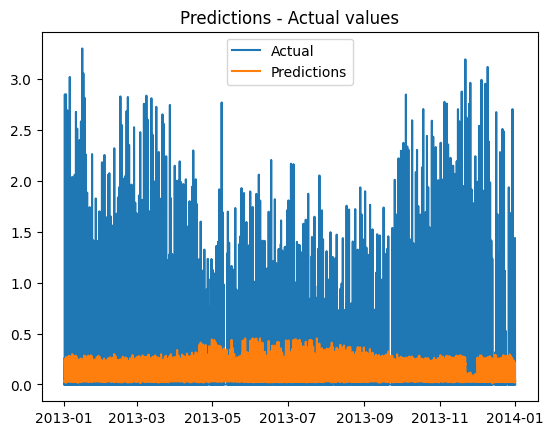

In [ ]:
plt.plot(results_GRU['Actuals'], label='Actual')
plt.plot(results_GRU['Predictions'], label='Predictions')
plt.legend()
plt.title('Predictions - Actual values')
p_path = plot_path + 'GRU/results_load_weather_GRU.png'
plt.savefig(p_path)

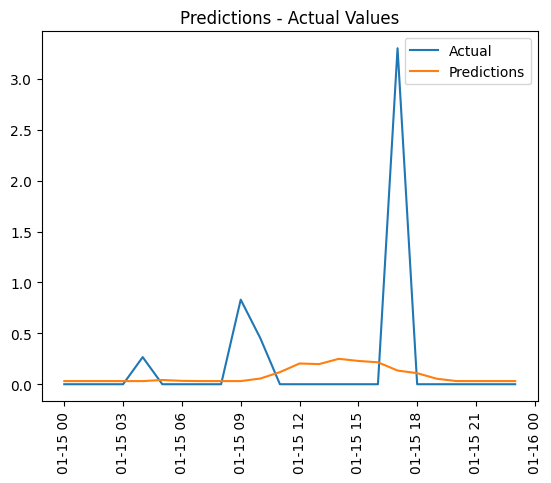

In [ ]:
# Prediction of one day in winter
results_day_GRU = results_GRU.loc['2013-01-15']
plt.plot(results_day_GRU['Actuals'], label='Actual')
plt.plot(results_day_GRU['Predictions'], label='Predictions')
plt.legend()
plt.xticks(rotation='vertical')
plt.title('Predictions - Actual Values')
p_path = plot_path + 'GRU/results_load_weather_GRU_winter.png'
plt.savefig(p_path)

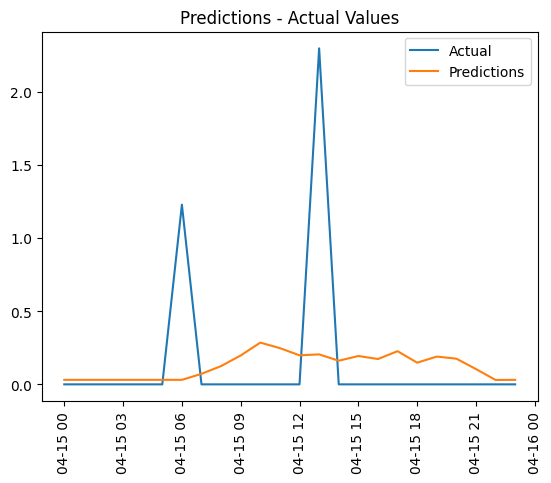

In [ ]:
# Prediction of one day in spring
results_day_GRU = results_GRU.loc['2013-04-15']
plt.plot(results_day_GRU['Actuals'], label='Actual')
plt.plot(results_day_GRU['Predictions'], label='Predictions')
plt.legend()
plt.xticks(rotation='vertical')
plt.title('Predictions - Actual Values')
p_path = plot_path + 'GRU/results_load_weather_GRU_spring.png'
plt.savefig(p_path)

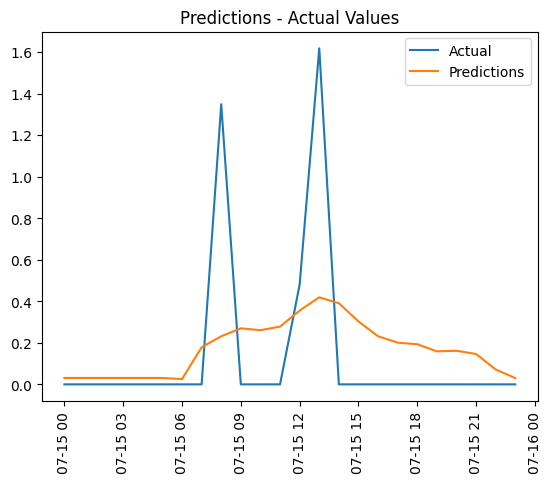

In [ ]:
# Prediction of one day in summer
results_day_GRU = results_GRU.loc['2013-07-15']
plt.plot(results_day_GRU['Actuals'], label='Actual')
plt.plot(results_day_GRU['Predictions'], label='Predictions')
plt.legend()
plt.xticks(rotation='vertical')
plt.title('Predictions - Actual Values')
p_path = plot_path + 'GRU/results_load_weather_GRU_summer.png'
plt.savefig(p_path)

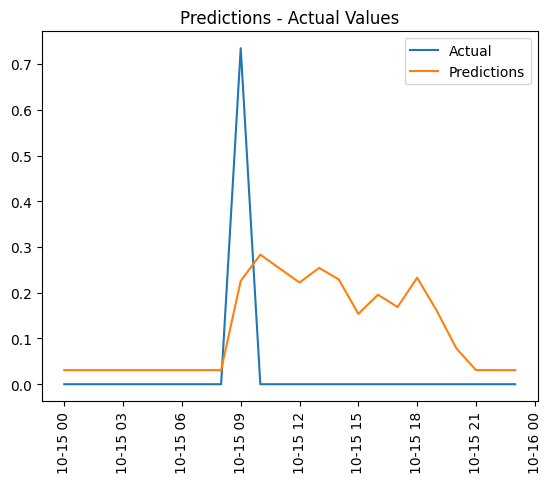

In [ ]:
# Prediction of one day in autumn
results_day_GRU = results_GRU.loc['2013-10-15']
plt.plot(results_day_GRU['Actuals'], label='Actual')
plt.plot(results_day_GRU['Predictions'], label='Predictions')
plt.legend()
plt.xticks(rotation='vertical')
plt.title('Predictions - Actual Values')
p_path = plot_path + 'GRU/results_load_weather_GRU_autumn.png'
plt.savefig(p_path)

In [ ]:
mse_GRU = mean_squared_error(results_GRU['Actuals'], results_GRU['Predictions'])
mae_GRU = mean_absolute_error(results_GRU['Actuals'], results_GRU['Predictions'])
rmse_GRU = math.sqrt(mse_GRU)
print('mse GRU: ' + str(mse_GRU))
print('mae GRU: ' + str(mae_GRU))
print('rmse GRU: ' + str(rmse_GRU))

mse GRU: 0.14948646948855443
mae GRU: 0.1931478506022288
rmse GRU: 0.38663480118653887
